# Machine Learning Computer Homework 2
# Mehran Mazaheri - 98102346
## 1: Polynomial Regression
In this question, the dataset contains only one feature that is a real number. We want to learn polynomial regression from degree n=1 to degree n=15 using the linear learning method and determine the best degree n for polynomial by comparing the results. 

You are only required to write code in the sections marked with `TODO:`      
Feel free to contact me via telegram if you have any question: @PouyaSha, @zahrasodagar

In [41]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size':18})

1. Three datasets S, V and T have been provided to you. which are in train_data.npy, validation_data.npy and test_data.npy files respectively. As you can see, we use S, V and T respectively for training, choosing the best polynomial degree and error estimation for the best polynomial.

In [56]:
# load the training, validation and test sets
S = np.load('train_data.npy')
V = np.load('validation_data.npy')
T = np.load('test_data.npy')

2. Based on the training data S, for each degree of polynomial n=1 to n=15, learn a polynomial with degree n by linear regression method. Call the learned polynomial for n $h_n$. Plot the empirical error of the polynomials $h_n$ for the training data S, which we denote by $L_S(h_n)$ in terms of n.

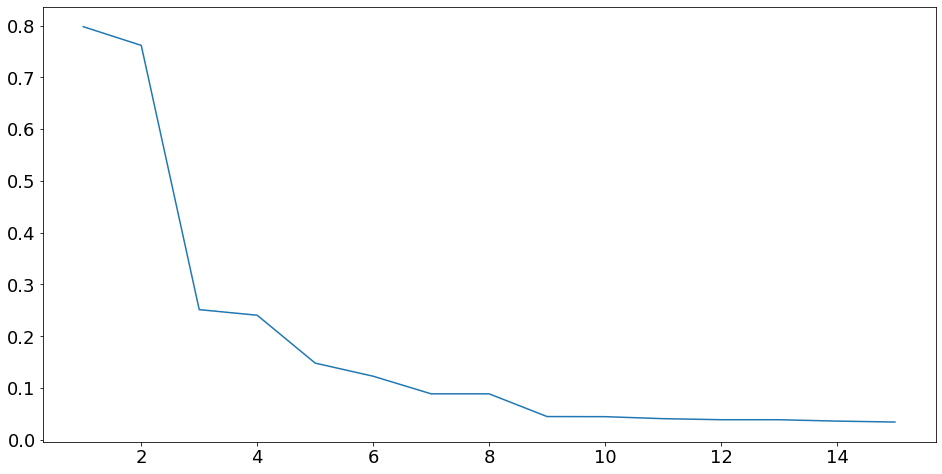

In [66]:
#learn the polynomial weights using numpy and plot the empirical errors
X = np.ones((S.shape[0],16))
Ws = list()
MSEsOnTrainingData = list()
for i in range(1,16):
    X[:,i] = S[:,0] ** i
    w = np.linalg.inv(X[:,:i].T @ X[:,:i]) @ X[:,:i].T @ S[:,1]
    Ws.append(list(w))
    mse = np.mean((X[:,:i] @ w - S[:,1])**2)
    MSEsOnTrainingData.append(mse)
plt.plot(list(range(1,16)), MSEsOnTrainingData)

3. In order to choose the best polynomial degree, we should not compare $L_S(h_n)$ for different (why?). We get an estimate of $L(h_n)$ based on the dataset V and call it $L_V(h_n)$ which is the average error for dataset V points.
Calculate $L_V(h_n)$ for n=1,...,15 and plot it in terms of n, next to the $L_S(h_n)$ curve from the previous part.

(YOUR ANSWER) <br>
because $L_S(h_n)$ indicates empirical loss and minimizing it, cause overfitting and choosing most complex model, the model selection must be done with validation data which don't have any effect on model parameters

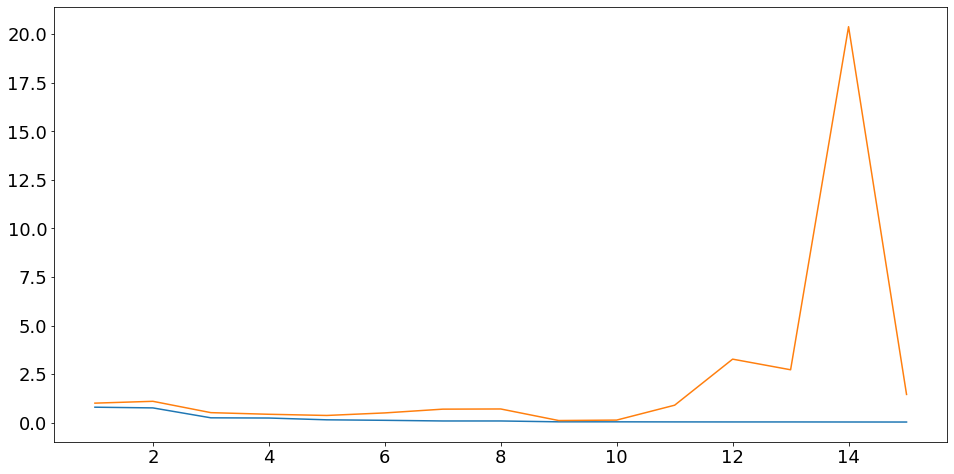

In [69]:
# plot the errors on both training set and validation set
X = np.ones((V.shape[0],16))
Y = V[:,1]
MSEsOnValidationData = list()
for i in range(1,16):
    X[:,i] = V[:,0] ** i
    mse = np.mean((X[:,:i] @ Ws[i-1] - Y)**2)
    MSEsOnValidationData.append(mse)
plt.figure()
axes = plt.axes()
axes.plot(list(range(1,16)), MSEsOnTrainingData)
axes.plot(list(range(1,16)), MSEsOnValidationData)


4. Compare the behavior of $L_S(h_n)$ and $L_V(h_n)$ in terms of n and explain the difference between the two curves.

(YOUR ANSWER)<br>
 $L_S(h_n)$ is strictly descending in terms of n but $L_V(h_n)$ is descending at first and then become ascending

5. Using the above results, conclude that the best regression of polynomials in this problem is of
what degree? Which of the two curves $L_S(h_n)$ and $L_V(h_n)$ should be used for this conclusion?
Why?

In [86]:
np.argmin(MSEsOnValidationData)

8

(YOUR ANSWER)<br>
the best regression is obtained at degree of 8 based $argmin(L_V(h_n))$. because $L_S(h_n)$ has been minimized by regression(parameter selection) and could not be used to select model because of overfitting

6. Call the best polynomial obtained in clause d as $h^*$. We don’t know the true error value of this polynomial or $L(h^*)$ and again we have to settle for an estimate of it. Therefore, we consider the average error of $h^*$ on the dataset T or $L_T(h_n)$ as the estimate of $L(h^*)$. Calculate $L_T(h_n)$.

    Can you intuitively explain why it is not good to use dataset V to estimate $L(h^*)$ and it is necessary to use a third dataset i.e. T?

(YOUR ANSWER)<br>
because we used $L_V(h_n)$ for model selection so it could not be a good measurement to estimate our regression and it has effected on regression, so $w$ and $L_V(h_n)$ aren't independent and $L_V(h_n)$ couldn't be used to test $L(h^*)$

In [87]:
#report the error on testing dataset
X = np.ones((T.shape[0],16))
Y = T[:,1]
wIndex = np.argmin(MSEsOnValidationData)
for i in range(1, wIndex+1):
    X[:,i] = T[:,0] ** i
mse = np.mean((X[:,:wIndex+1] @ Ws[wIndex] - Y)**2)
print("error on Test Data: ", mse)

error on Test Data:  0.11791424797209024


#### Bonus
Complete the following functions and implement polynomial regression from scratch. Calculate the errors on all of the three sets and compare the results. What are the other methods that can be used to calculate the weights?

In [ ]:
def x_transform(X:np.ndarray, degrees:list) -> np.ndarray:
    X_cp = np.ones((X.size, len(degrees)))
    i = 0
    for degree in degrees:
        X_cp[:,i] = X ** degree
        i += 1
    return X_cp


def loss(y, y_hat):
    loss = (y - y_hat)**2
    return loss


def gradients(X, y, y_hat):
    m = # TODO number of training examples
    
    dw = # TODO gradient of loss with respect to weights
    db = # TODO gradient of loss with respect to bias
    return dw, db


def train(X, y, bs, degrees, epochs, lr):
    m, n = 1 ,np.size(X, axis=1)
    x = x_transform(X, degrees)
    y = y.reshape(-1,1)
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0

    losses = []
    
    for epoch in range(epochs):
        batches = # TODO list of indices for each batch that is generated randomly
        for batch in batches:
            xb = # TODO x batch
            yb = # TODO y batch
            
            y_hat = # TODO calculate the hypothesis using w and b
            
            dw, db = gradients(xb, yb, y_hat)
            
            w -= # TODO update w with respect to the learning rate
            b -= # TODO update b with respect to the learning rate
        
        l = loss(y, np.dot(x, w) + b)
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses


def predict(X, w, b, degrees):
    x1 = x_transform(X, degrees)
    y = w@x1 + b
    return y

In [ ]:
# TODO fit the polynomials and evaluate the results using your own functions and 
# compare it to the previous section

(TODO: YOUR ANSWER) <br>
Huber loss could be used instead of L2-loss and we can use momentum, Newton's method or stochastic gradient descent to decrease loss function